FACTORS IN DATASET AND THEIR IMPORTANCE
1. Debt to Equity Ratio
2. ROI
3. ROE
4. ROA
5. Net Income
6. Revenue
7. Current Ratio
8. Gross Margin
9. Free Cash Flow

In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from mpl_toolkits.mplot3d import Axes3D

In [2]:
#Import BeautifulSoup
from bs4 import BeautifulSoup

In [3]:
#Scraping Data Data
page = requests.get("https://ycharts.com/companies/AAPL/net_income_ttm")
page

page2 = requests.get("https://ycharts.com/companies/AAPL/gross_profit_margin")
page2

page3 = requests.get("https://ycharts.com/companies/AAPL/free_cash_flow")
page3

<Response [200]>

In [4]:
#Website Structure
soup = BeautifulSoup(page.content)
soup2 = BeautifulSoup(page2.content)
soup3 = BeautifulSoup(page3.content)

In [5]:
#Left DataTable and Right DataTable
My_table = soup.find('table',{'class':'histDataTable'})
My_table_right = soup.find('div',{'class':'dataColRt'})

In [6]:
#index array 
index = [0]*50
for i in range(50):
    index[i] = i

for i in range(len(index)):
    index[i] += 1

index = pd.DataFrame(index)
index.columns = ['index']

In [7]:
#2006-2019 Quarter Dates List
dates = []
for tag in My_table.select(".col1 "):
  text = tag.get_text()
  dates.append(text)
dates = dates[1:]
dates = pd.Series(dates)

dates2 =[]
for tag in My_table_right.select(".col1 "):
  text = tag.get_text()
  dates2.append(text)
dates2 = dates2[1:]
dates2 = pd.Series(dates2)

quarters = dates.append(dates2)
quarters = pd.DataFrame(quarters)
quarters.index = range(50)
quarters.columns = ['Date']

In [8]:
#2006-2019 Quarter NI list
NI = []
for tag in My_table.select(".col2 "):
  text = tag.get_text()
  NI.append(text)
NI = NI[1:]
NI = pd.Series(NI)
NI = NI.str.strip(" ")
NI = NI.str.strip("\n")
NI = NI.str.strip(" ")
NI = NI.str.strip("\n")
NI = NI.str.strip(" ")
NI = NI.str.strip("B")

NI2 =[]
for tag in My_table_right.select(".col2 "):
  text = tag.get_text()
  NI2.append(text)
NI2 = NI2[1:]
NI2 = pd.Series(NI2)
NI2 = NI2.str.strip(" ")
NI2 = NI2.str.strip("\n")
NI2 = NI2.str.strip(" ")
NI2 = NI2.str.strip("\n")
NI2 = NI2.str.strip(" ")
NI2 = NI2.str.strip("B")

NIFinal = NI.append(NI2)
NIFinal = pd.DataFrame(NIFinal)
NIFinal.index = range(50)
NIFinal.columns = ['Net Income']

In [9]:
#2006-2019 revenue list
revenue = pd.read_csv("applerev.csv")
revenue = revenue['revenue'].dropna()
revenue = pd.DataFrame(revenue)
revenue.index = range(50)
revenue.columns = ['Gross Revenue']

In [10]:
#2006-2019 stock open price
stockprice = pd.read_csv("appledata2.csv")
stockprice = stockprice['Stock Price']
stockprice = stockprice.dropna()
stockprice = pd.DataFrame(stockprice)
stockprice.index = range(50)
stockprice.columns = ['Stock Price']

In [11]:
#2006-2019 p/e ratio
peratio = pd.read_csv("appledata2.csv")
peratio = peratio['PE Ratio']
peratio = peratio.dropna()
peratio = pd.DataFrame(peratio)
peratio.index = range(50)
peratio.columns = ['P/E Ratio']

In [12]:
#2006-2019 return on equity
roe = pd.read_csv("appledata3.csv")
roe = roe['Return on Equity']
roe = roe.dropna()
roe = pd.DataFrame(roe)
roe.index = range(50)
roe.columns = ['Return_On_Equity']
roe = roe['Return_On_Equity'].str.rstrip('%')

In [13]:
#2006-2019 return on investment
roi = pd.read_csv("appledata4.csv")
roi = roi['Return on Investment']
roi = roi.dropna()
roi = pd.DataFrame(roi)
roi.index = range(50)
roi.columns = ['Return_On_Investment']
roi = roi['Return_On_Investment'].str.rstrip('%')

In [14]:
# 2006-2019 return on assets
roa = pd.read_csv("appledata9.csv")
roa = roa['Return on Assets']
roa = roa.dropna()
roa = pd.DataFrame(roa)
roa.index = range(50)
roa.columns = ['Return_On_Assets']
roa = roa['Return_On_Assets'].str.rstrip('%')

In [15]:
#2006-2019 current ratio
currratio = pd.read_csv("appledata6.csv")
currratio = currratio['Current Ratio']
currratio = currratio.dropna()
currratio = pd.DataFrame(currratio)
currratio.index = range(50)
currratio.columns = ['Current_Ratio']

In [16]:
#2006-2019 gross margin
grossmargin = pd.read_csv("appledata7.csv")
grossmargin = grossmargin['Gross Margin']
grossmargin = grossmargin.dropna()
grossmargin = pd.DataFrame(grossmargin)
grossmargin.index = range(50)
grossmargin.columns = ['Gross_Margin']
grossmargin = grossmargin['Gross_Margin'].str.rstrip('%')

In [17]:
#2006-2019 free cash flow
freecashflow = pd.read_csv("appledata8.csv")
freecashflow = freecashflow['Free Cash Flow']
freecashflow = freecashflow.dropna()
freecashflow = pd.DataFrame(freecashflow)
freecashflow.index = range(50)
freecashflow.columns = ['Free_Cash_Flow']

In [18]:
#Left DataTable and Right DataTable
My_table2 = soup2.find('div',{'class':'dataColLeft'})
My_table_right2 = soup2.find('div',{'class':'dataColRt'})

#2009-2016 gross profit margin
GPM = []
for tag in My_table2.select(".col2 "):
  text = tag.get_text()
  GPM.append(text)
    
GPM = GPM[1:]
GPM = pd.Series(GPM)
GPM = GPM.str.strip("\n")
GPM = GPM.str.strip(" ")
GPM = GPM.str.strip("\n")
GPM = GPM.str.strip(" ")
GPM = GPM.str.strip("\n")
GPM = GPM.str.strip("%")


GPM2 = []
for tag in My_table_right2.select(".col2 "):
  text = tag.get_text()
  GPM2.append(text)
    
GPM2 = GPM2[1:]
GPM2 = pd.Series(GPM2)
GPM2 = GPM2.str.strip("\n")
GPM2 = GPM2.str.strip(" ")
GPM2 = GPM2.str.strip("\n")
GPM2 = GPM2.str.strip(" ")
GPM2 = GPM2.str.strip("\n")
GPM2 = GPM2.str.strip("%")

GPMFinal = GPM.append(GPM2)
GPMFinal = pd.DataFrame(GPMFinal)
GPMFinal.index = range(50)
GPMFinal.columns = ['Gross_Profit_Margin']

In [19]:
#Left DataTable and Right DataTable
My_table3 = soup3.find('div',{'class':'dataColLeft'})
My_table_right3 = soup3.find('div',{'class':'dataColRt'})

#2009-2016 free cash flow
FCF = []
for tag in My_table3.select(".col2 "):
  text = tag.get_text()
  FCF.append(text)
    
FCF = FCF[1:]
FCF = pd.Series(FCF)
FCF = FCF.str.strip("\n")
FCF = FCF.str.strip(" ")
FCF = FCF.str.strip("\n")
FCF = FCF.str.strip(" ")
FCF = FCF.str.strip("\n")
FCF = FCF.str.strip("B")


FCF2 = []
for tag in My_table_right3.select(".col2 "):
  text = tag.get_text()
  FCF2.append(text)
    
FCF2 = FCF2[1:]
FCF2 = pd.Series(FCF2)
FCF2 = FCF2.str.strip("\n")
FCF2 = FCF2.str.strip(" ")
FCF2 = FCF2.str.strip("\n")
FCF2 = FCF2.str.strip(" ")
FCF2 = FCF2.str.strip("\n")
FCF2 = FCF2.str.strip("B")
FCF2 = FCF2.str.strip("M")


FCFFinal = FCF.append(FCF2)
FCFFinal = pd.DataFrame(FCFFinal)
FCFFinal.index = range(50)
FCFFinal.columns = ['Free_Cash_Flow']

In [20]:
#combining features into one dataframe
from typing import List, Any, Union

stock_feature_frames = [quarters,NIFinal,revenue,stockprice,peratio,roe,roi,roa,currratio,grossmargin,freecashflow,GPMFinal,FCFFinal]
stock_features = pd.concat(stock_feature_frames, axis=1)
stock_features.columns: List[Union[str, Any]] = ['Date','Net_Income','Gross_Revenue','Stock_Price', 'P/E_Ratio', 'Return_On_Equity', 'Return_On_Investment', 'Return_On_Assets', 'Current_Ratio', 'Gross_Margin', 'Free_Cash_Flow', 'Gross_Profit_Margin', 'Free_Cash_Flow2']
stock_features = stock_features.drop(columns=['Free_Cash_Flow2'])
stock_features.head()


,Date,Net_Income,Gross_Revenue,Stock_Price,P/E_Ratio,Return_On_Equity,Return_On_Investment,Return_On_Assets,Current_Ratio,Gross_Margin,Free_Cash_Flow,Gross_Profit_Margin
0,"June 30, 2019",55.70,58015.0,189.95,15.98,51.29,31.95,15.98,1.32,38.05,32127.0,37.59
1,"March 31, 2019",57.17,62900.0,157.07,12.92,50.92,31.91,16.33,1.30,38.21,23335.0,37.61
2,"Dec. 31, 2018",59.43,53265.0,223.99,18.87,48.68,32.03,15.99,1.13,38.34,64121.0,37.99
3,"Sept. 30, 2018",59.53,61137.0,183.03,16.59,43.50,29.66,14.98,1.31,38.27,47639.0,38.29
4,"June 30, 2018",56.12,84310.0,165.26,15.95,39.97,28.54,14.27,1.46,38.30,36418.0,38.34


In [21]:
#CHANGING DATA TYPES OF ALL COLUMNS TO FLOATS
stock_features["Net_Income"] = pd.to_numeric(stock_features["Net_Income"])
stock_features["Return_On_Equity"] = pd.to_numeric(stock_features["Return_On_Equity"])
stock_features["Return_On_Investment"] = pd.to_numeric(stock_features["Return_On_Investment"])
stock_features["Return_On_Assets"] = pd.to_numeric(stock_features["Return_On_Assets"])
stock_features["Gross_Margin"] = pd.to_numeric(stock_features["Net_Income"])
stock_features["Gross_Profit_Margin"] = pd.to_numeric(stock_features["Gross_Profit_Margin"])
stock_features.dtypes

Date                     object
Net_Income              float64
Gross_Revenue           float64
Stock_Price             float64
P/E_Ratio               float64
Return_On_Equity        float64
Return_On_Investment    float64
Return_On_Assets        float64
Current_Ratio           float64
Gross_Margin            float64
Free_Cash_Flow          float64
Gross_Profit_Margin     float64
dtype: object

DATA VISUALIZATIONS

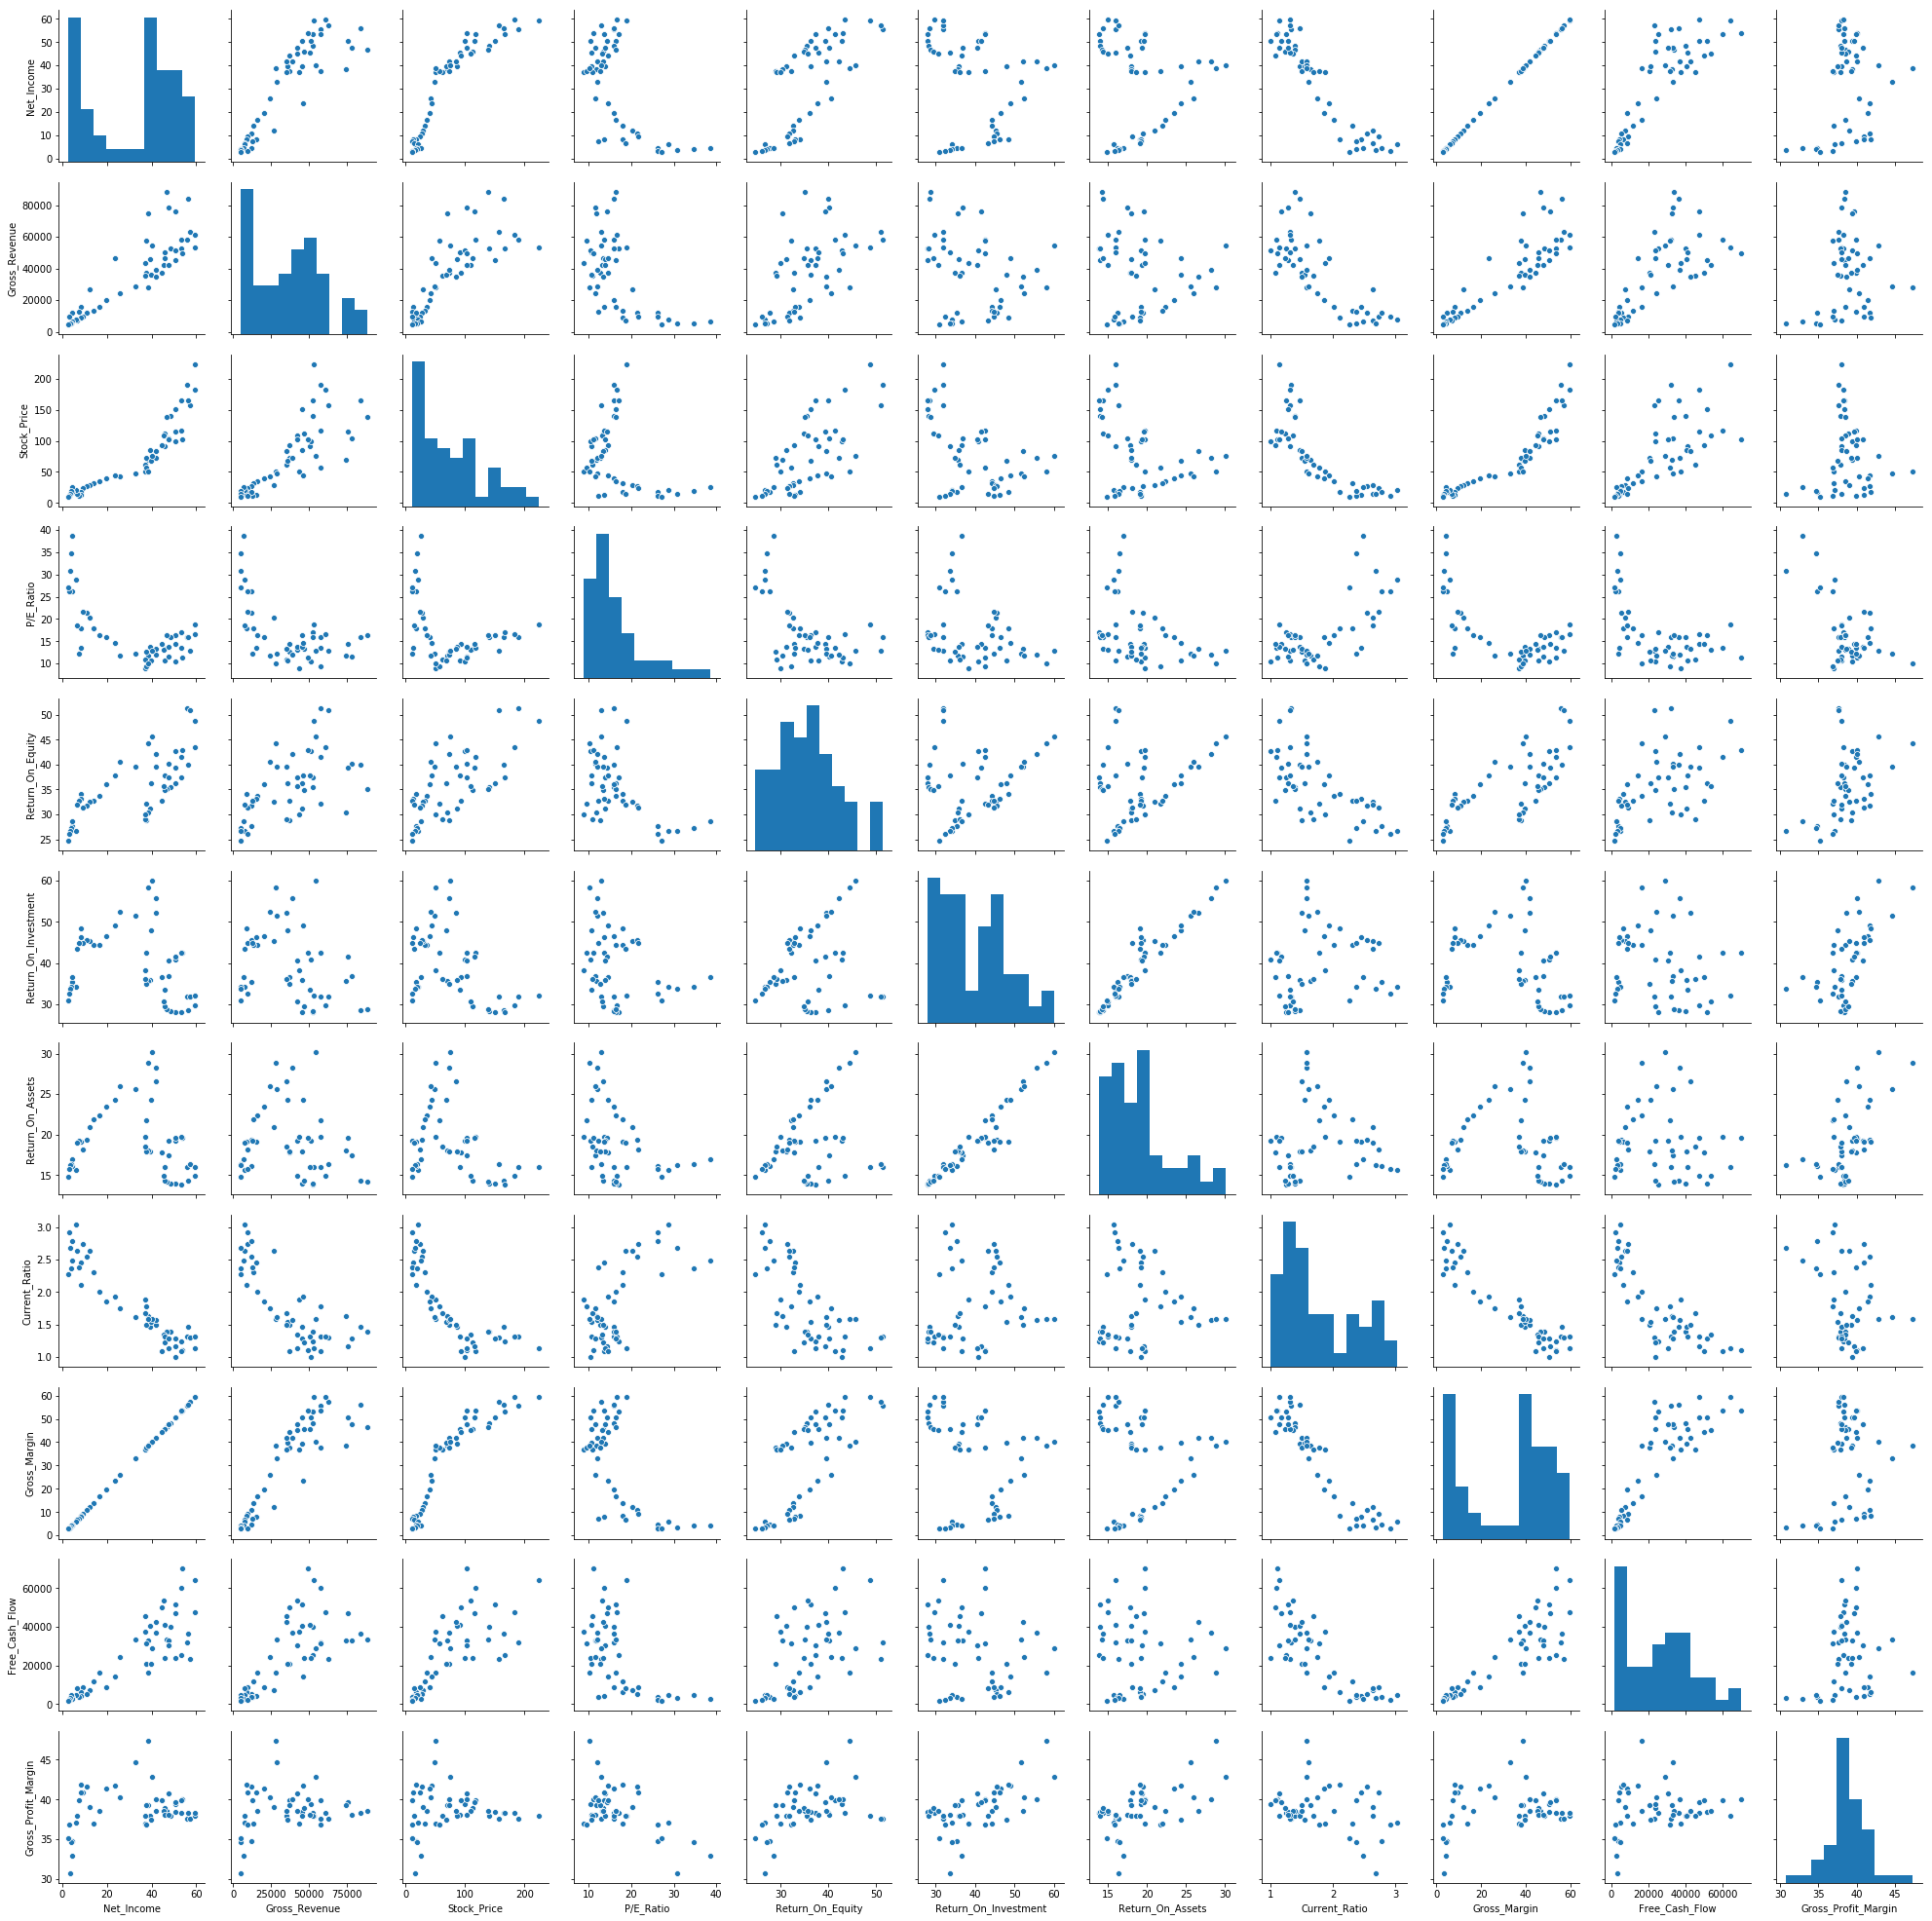

In [22]:
#pairplot
sns.pairplot(stock_features)

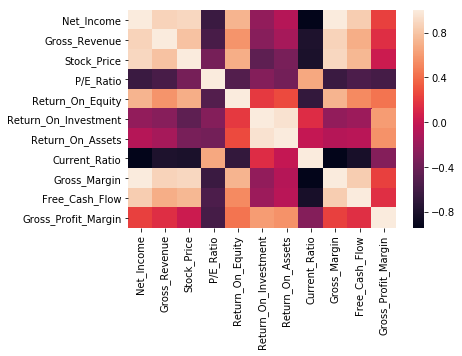

In [23]:
#plotting correlation heatmap
corr = stock_features.corr()
sns.heatmap(corr)

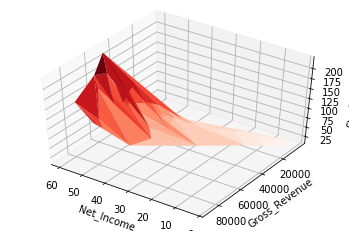

In [24]:
#plotting multiple variables
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_trisurf(stock_features['Net_Income'], stock_features['Gross_Revenue'], stock_features['Stock_Price'], cmap=plt.cm.Reds, linewidth=0.2)
ax.view_init(45, 125)
ax.set_xlabel('Net_Income')
ax.set_ylabel('Gross_Revenue')
ax.set_zlabel('Stock_Price')
plt.show()

#CONCLUSION: as net income and gross-revenue go up, stock price goes up
#            as net income goes up gross revenue goes up also

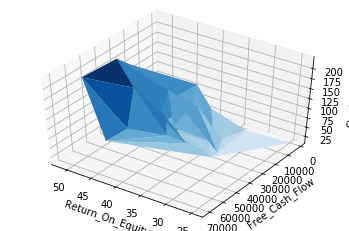

In [25]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_trisurf(stock_features['Return_On_Equity'], stock_features['Free_Cash_Flow'], stock_features['Stock_Price'], cmap=plt.cm.Blues, linewidth=0.2)
ax.view_init(45, 125)
ax.set_xlabel('Return_On_Equity')
ax.set_ylabel('Free_Cash_Flow')
ax.set_zlabel('Stock_Price')
plt.show()

#CONCLUSION: as roe and free cash flow go up, stock price goes up
#            as roe goes up free cash flow goes up also

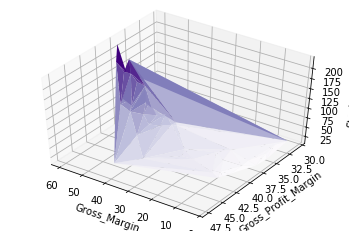

In [26]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_trisurf(stock_features['Gross_Margin'], stock_features['Gross_Profit_Margin'], stock_features['Stock_Price'], cmap=plt.cm.Purples, linewidth=0.2)
ax.view_init(45, 125)
ax.set_xlabel('Gross_Margin')
ax.set_ylabel('Gross_Profit_Margin')
ax.set_zlabel('Stock_Price')
plt.show()

#CONCLUSION: as gross margin and gross-profit-margin go up, stock price goes up
#            as gross margin goes up gross-profit-margin goes up also

In [27]:
#time series data 
date = pd.to_datetime(stock_features['Date'])
date = pd.DataFrame(date)
date.columns = ['date']

In [28]:
stock_features = pd.concat([stock_features, date], axis=1)
stock_features

,Date,Net_Income,Gross_Revenue,Stock_Price,P/E_Ratio,Return_On_Equity,Return_On_Investment,Return_On_Assets,Current_Ratio,Gross_Margin,Free_Cash_Flow,Gross_Profit_Margin,date
0,"June 30, 2019",55.700,58015.0,189.95,15.98,51.29,31.95,15.98,1.32,55.700,32127.0,37.59,2019-06-30
1,"March 31, 2019",57.170,62900.0,157.07,12.92,50.92,31.91,16.33,1.30,57.170,23335.0,37.61,2019-03-31
2,"Dec. 31, 2018",59.430,53265.0,223.99,18.87,48.68,32.03,15.99,1.13,59.430,64121.0,37.99,2018-12-31
3,"Sept. 30, 2018",59.530,61137.0,183.03,16.59,43.50,29.66,14.98,1.31,59.530,47639.0,38.29,2018-09-30
4,"June 30, 2018",56.120,84310.0,165.26,15.95,39.97,28.54,14.27,1.46,56.120,36418.0,38.34,2018-06-30
5,"March 31, 2018",53.320,52579.0,166.02,17.06,37.37,28.05,13.83,1.24,53.320,25483.0,38.31,2018-03-31
6,"Dec. 31, 2017",50.520,45408.0,150.65,16.38,36.29,27.94,13.95,1.28,50.520,51774.0,38.41,2017-12-31
7,"Sept. 30, 2017",48.350,52896.0,140.21,15.93,35.40,28.21,14.00,1.39,48.350,39890.0,37.91,2017-09-30
8,"June 30, 2017",46.650,88293.0,139.29,16.29,35.09,28.81,14.15,1.39,46.650,33495.0,38.51,2017-06-30
9,"March 31, 2017",45.730,46852.0,111.82,13.39,34.94,29.42,14.31,1.23,45.730,23900.0,38.93,2017-03-31


In [29]:
stock_features = stock_features.drop(columns = ['Date'])
stock_features['Gross_Revenue'] = stock_features['Gross_Revenue']/1000
stock_features.columns = ['Net_Income','Gross_Revenue','Stock_Price', 'PE_Ratio','Return_On_Equity','Return_On_Investment','Return_On_Assets','Current_Ratio','Gross_Margin','Free_Cash_Flow','Gross_Profit_Margin','date']
stock_features


,Net_Income,Gross_Revenue,Stock_Price,PE_Ratio,Return_On_Equity,Return_On_Investment,Return_On_Assets,Current_Ratio,Gross_Margin,Free_Cash_Flow,Gross_Profit_Margin,date
0,55.700,58.015,189.95,15.98,51.29,31.95,15.98,1.32,55.700,32127.0,37.59,2019-06-30
1,57.170,62.900,157.07,12.92,50.92,31.91,16.33,1.30,57.170,23335.0,37.61,2019-03-31
2,59.430,53.265,223.99,18.87,48.68,32.03,15.99,1.13,59.430,64121.0,37.99,2018-12-31
3,59.530,61.137,183.03,16.59,43.50,29.66,14.98,1.31,59.530,47639.0,38.29,2018-09-30
4,56.120,84.310,165.26,15.95,39.97,28.54,14.27,1.46,56.120,36418.0,38.34,2018-06-30
5,53.320,52.579,166.02,17.06,37.37,28.05,13.83,1.24,53.320,25483.0,38.31,2018-03-31
6,50.520,45.408,150.65,16.38,36.29,27.94,13.95,1.28,50.520,51774.0,38.41,2017-12-31
7,48.350,52.896,140.21,15.93,35.40,28.21,14.00,1.39,48.350,39890.0,37.91,2017-09-30
8,46.650,88.293,139.29,16.29,35.09,28.81,14.15,1.39,46.650,33495.0,38.51,2017-06-30
9,45.730,46.852,111.82,13.39,34.94,29.42,14.31,1.23,45.730,23900.0,38.93,2017-03-31


In [30]:
cols = stock_features.columns.tolist()
cols = cols[-1:] + cols[:-1]
stock_features = stock_features[cols]

Text(0, 0.5, 'Gross Revenue')

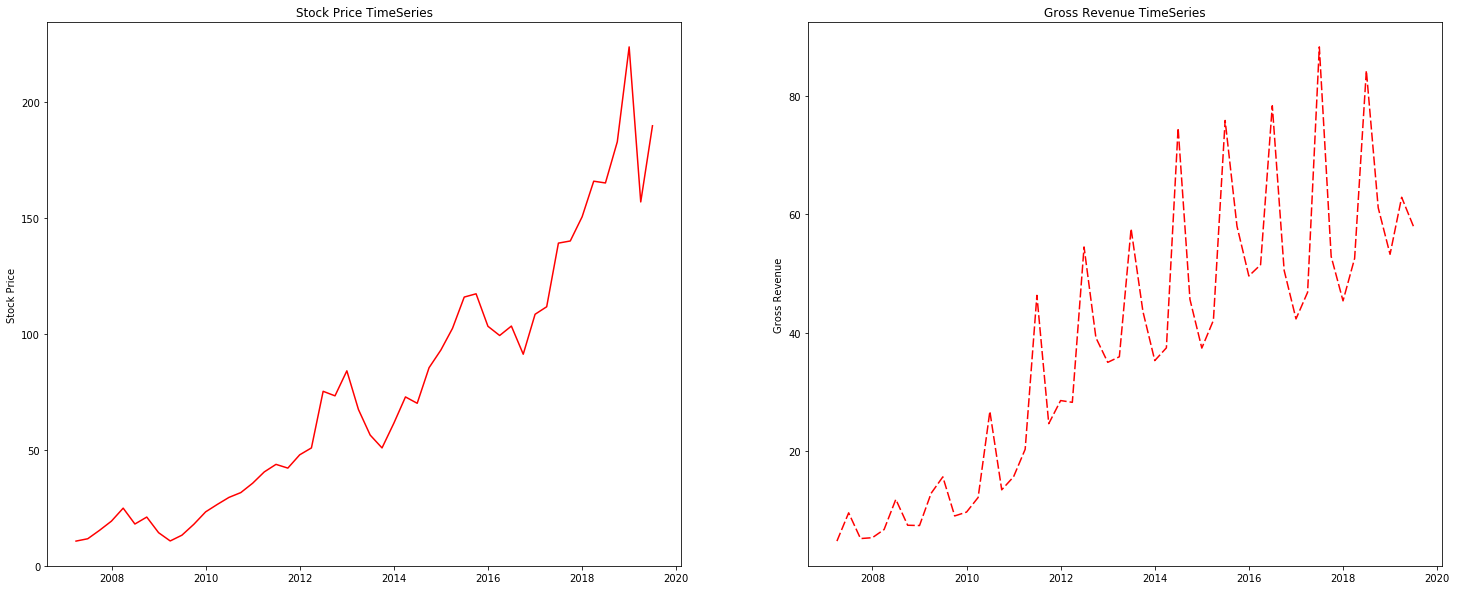

In [31]:
fig = plt.figure(figsize=(25,10))
ax1 = fig.add_subplot(1,2,1)
plot1 = ax1.plot(stock_features.date, stock_features.Stock_Price, color="Red")
plt.title("Stock Price TimeSeries")
plt.ylabel("Stock Price")


ax2 = fig.add_subplot(1,2,2)
plot2 = ax2.plot(stock_features.date, stock_features.Gross_Revenue, dashes=[6, 2], color="Red")
plt.title("Gross Revenue TimeSeries")
plt.ylabel("Gross Revenue")

Text(0, 0.5, 'Net Income')

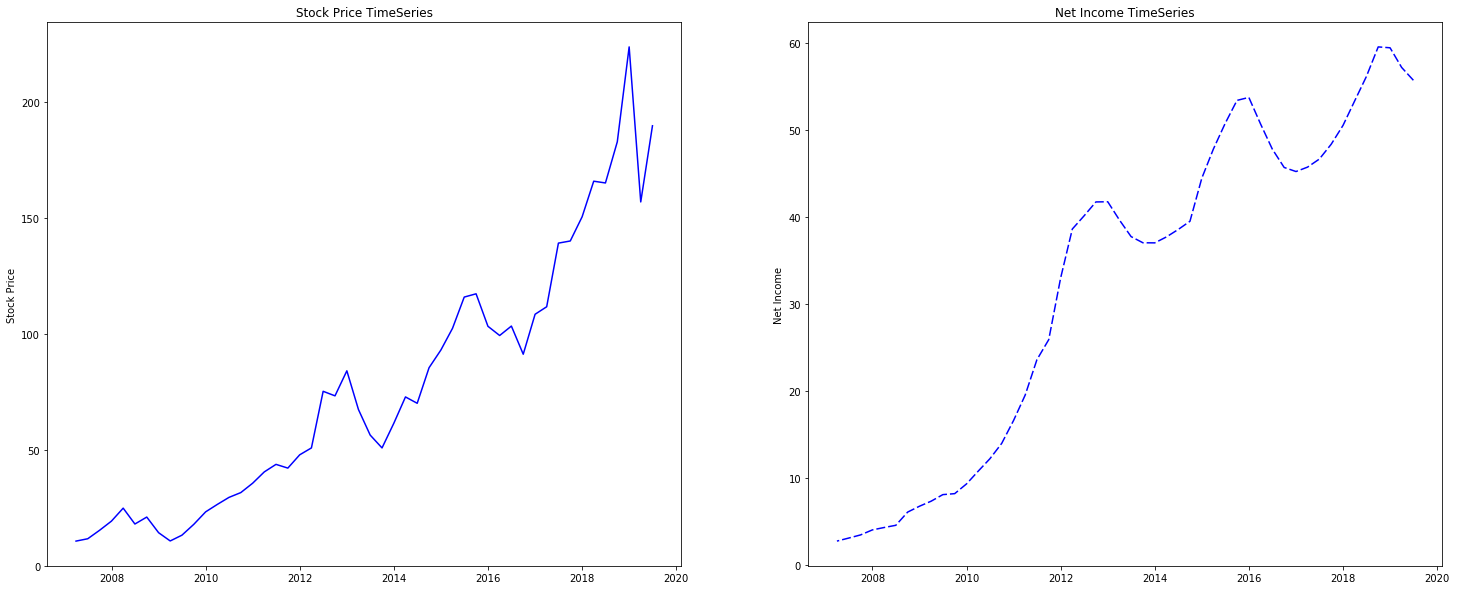

In [32]:
fig = plt.figure(figsize=(25,10))
ax1 = fig.add_subplot(1,2,1)
plot1 = ax1.plot(stock_features.date, stock_features.Stock_Price, color="Blue")
plt.title("Stock Price TimeSeries")
plt.ylabel("Stock Price")


ax2 = fig.add_subplot(1,2,2)
plot2 = ax2.plot(stock_features.date, stock_features.Net_Income, dashes=[6, 2], color="Blue")
plt.title("Net Income TimeSeries")
plt.ylabel("Net Income")

Text(0, 0.5, 'PE Ratio')

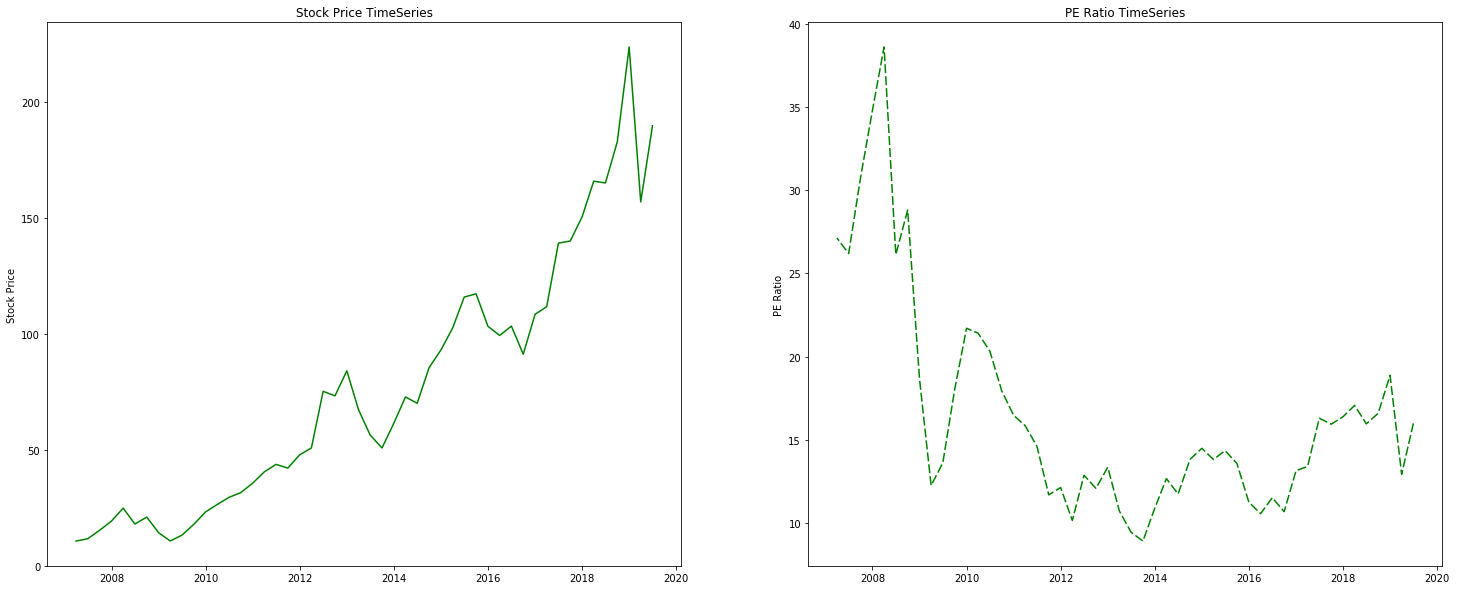

In [33]:
fig = plt.figure(figsize=(25,10))
ax1 = fig.add_subplot(1,2,1)
plot1 = ax1.plot(stock_features.date, stock_features.Stock_Price, color="Green")
plt.title("Stock Price TimeSeries")
plt.ylabel("Stock Price")


ax2 = fig.add_subplot(1,2,2)
plot2 = ax2.plot(stock_features.date, stock_features.PE_Ratio, dashes=[6, 2], color="Green")
plt.title("PE Ratio TimeSeries")
plt.ylabel("PE Ratio")

Text(0, 0.5, 'Free Cash Flow')

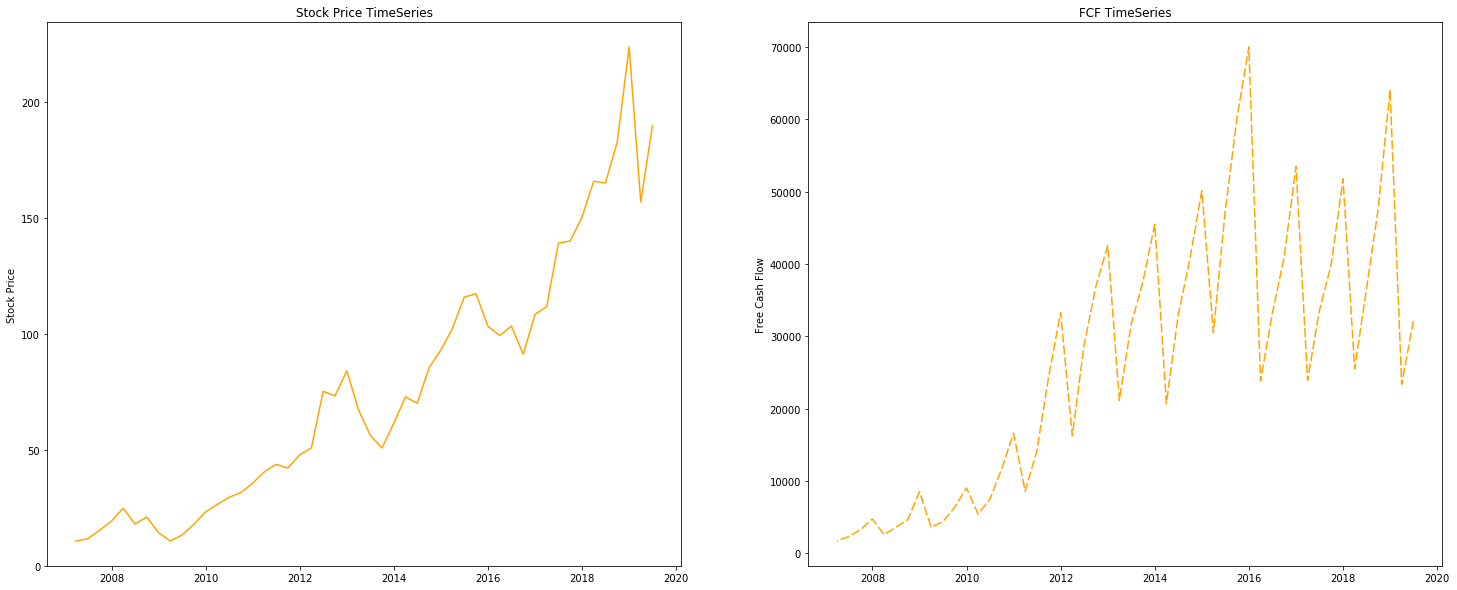

In [34]:
fig = plt.figure(figsize=(25,10))
ax1 = fig.add_subplot(1,2,1)
plot1 = ax1.plot(stock_features.date, stock_features.Stock_Price, color="Orange")
plt.title("Stock Price TimeSeries")
plt.ylabel("Stock Price")


ax2 = fig.add_subplot(1,2,2)
plot2 = ax2.plot(stock_features.date, stock_features.Free_Cash_Flow, dashes=[6, 2], color="Orange")
plt.title("FCF TimeSeries")
plt.ylabel("Free Cash Flow")

Text(0, 0.5, 'Return on Investment')

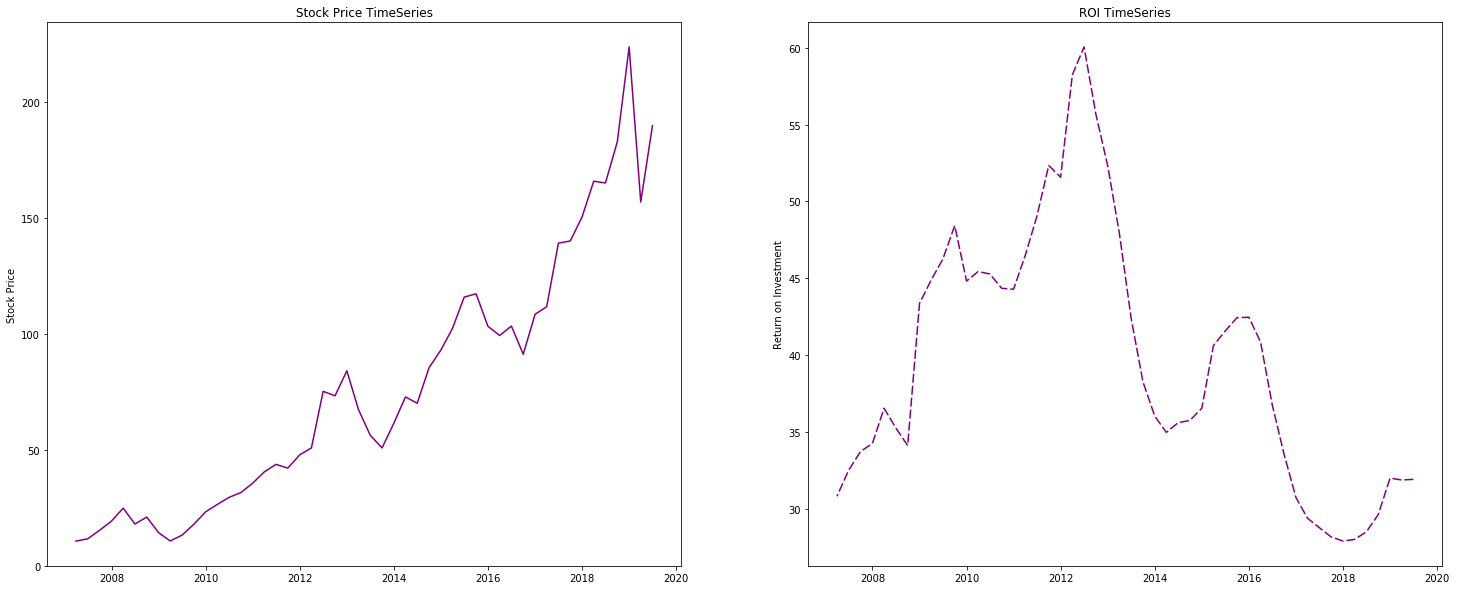

In [35]:
fig = plt.figure(figsize=(25,10))
ax1 = fig.add_subplot(1,2,1)
plot1 = ax1.plot(stock_features.date, stock_features.Stock_Price, color="Purple")
plt.title("Stock Price TimeSeries")
plt.ylabel("Stock Price")


ax2 = fig.add_subplot(1,2,2)
plot2 = ax2.plot(stock_features.date, stock_features.Return_On_Investment, dashes=[6, 2], color="Purple")
plt.title("ROI TimeSeries")
plt.ylabel("Return on Investment")

Text(0, 0.5, 'Return on Equity')

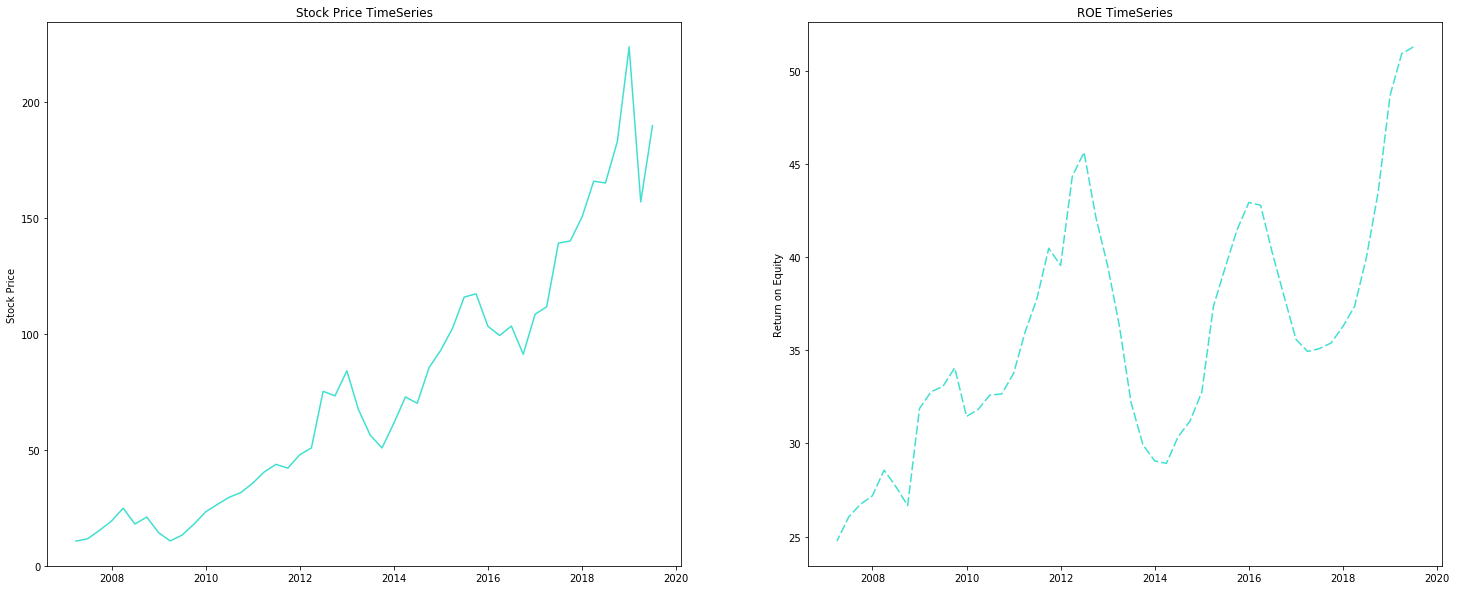

In [36]:
fig = plt.figure(figsize=(25,10))
ax1 = fig.add_subplot(1,2,1)
plot1 = ax1.plot(stock_features.date, stock_features.Stock_Price, color="Turquoise")
plt.title("Stock Price TimeSeries")
plt.ylabel("Stock Price")


ax2 = fig.add_subplot(1,2,2)
plot2 = ax2.plot(stock_features.date, stock_features.Return_On_Equity, dashes=[6, 2], color="Turquoise")
plt.title("ROE TimeSeries")
plt.ylabel("Return on Equity")

Text(0, 0.5, 'Return on Assets')

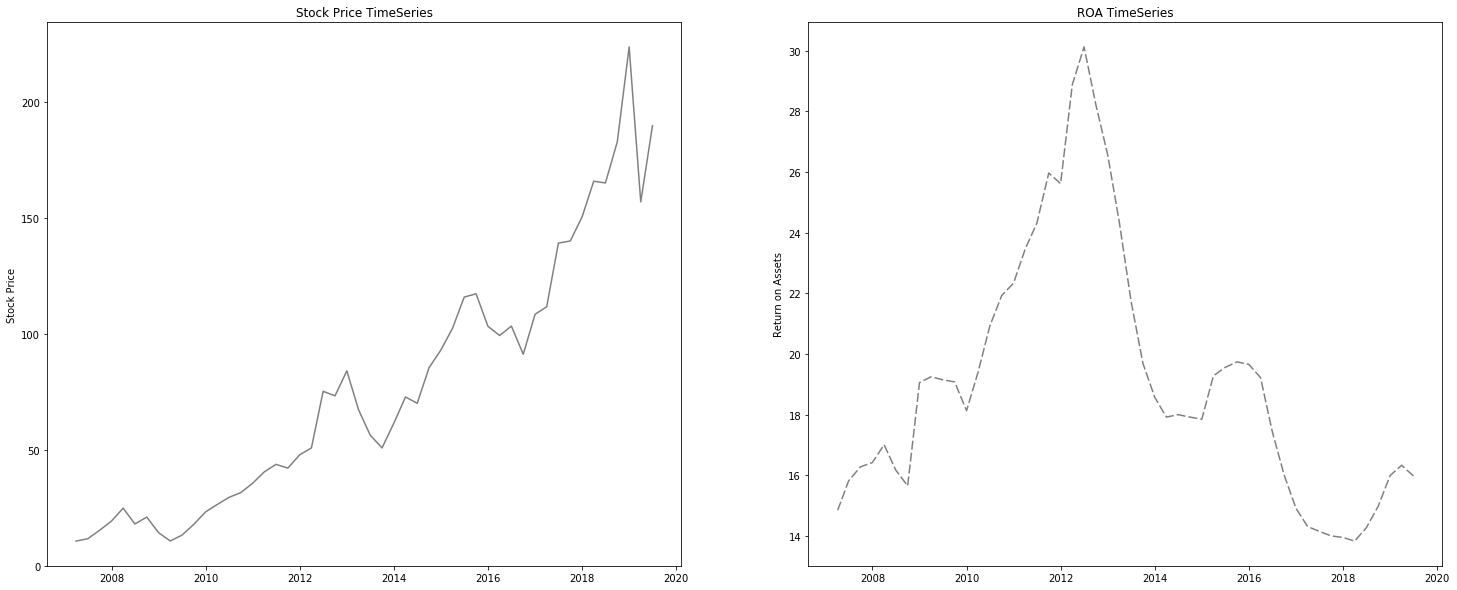

In [37]:
fig = plt.figure(figsize=(25,10))
ax1 = fig.add_subplot(1,2,1)
plot1 = ax1.plot(stock_features.date, stock_features.Stock_Price, color="Grey")
plt.title("Stock Price TimeSeries")
plt.ylabel("Stock Price")


ax2 = fig.add_subplot(1,2,2)
plot2 = ax2.plot(stock_features.date, stock_features.Return_On_Assets, dashes=[6, 2], color="Grey")
plt.title("ROA TimeSeries")
plt.ylabel("Return on Assets")

Text(0, 0.5, 'Gross Profit Margin')

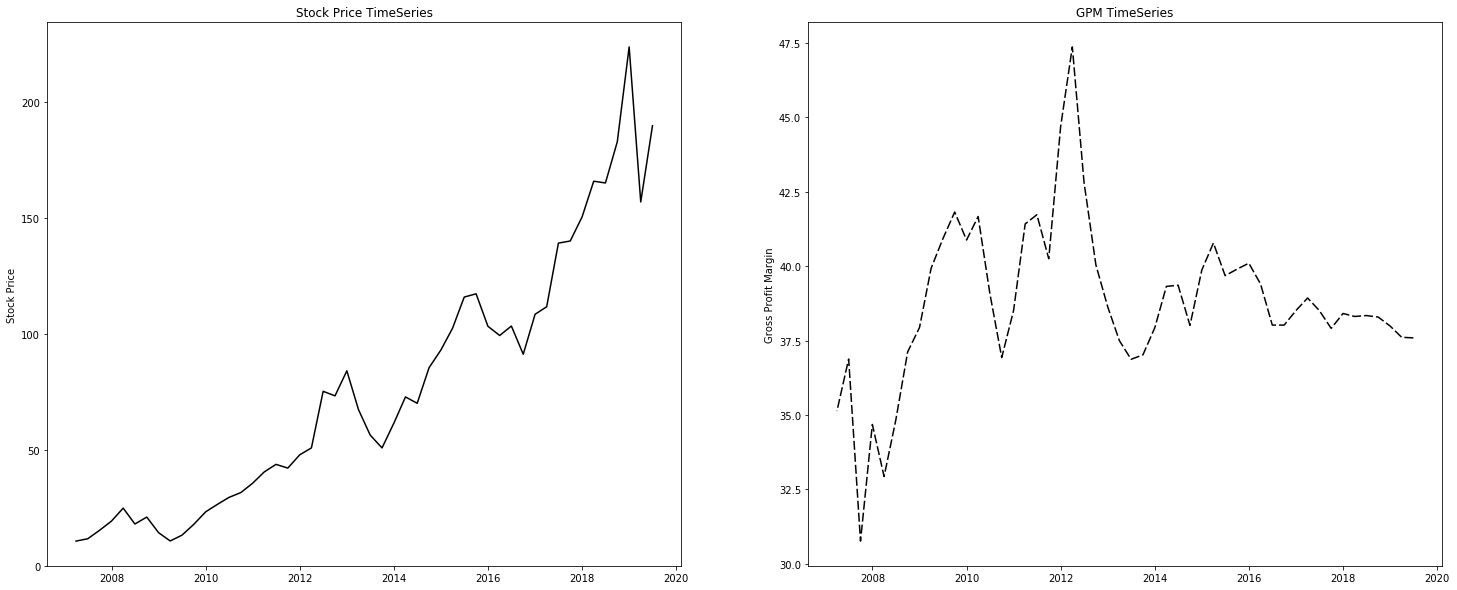

In [38]:
fig = plt.figure(figsize=(25,10))
ax1 = fig.add_subplot(1,2,1)
plot1 = ax1.plot(stock_features.date, stock_features.Stock_Price, color="Black")
plt.title("Stock Price TimeSeries")
plt.ylabel("Stock Price")


ax2 = fig.add_subplot(1,2,2)
plot2 = ax2.plot(stock_features.date, stock_features.Gross_Profit_Margin, dashes=[6, 2], color="Black")
plt.title("GPM TimeSeries")
plt.ylabel("Gross Profit Margin")

DOING REGRESSION ANALYSIS

In [39]:
#simple linear regression
import sklearn
from sklearn.model_selection import train_test_split

In [40]:
stock_features_copy = stock_features.copy()
stock_features_copy = stock_features_copy.drop(columns=['date'])
X = stock_features_copy.drop(columns=['Stock_Price'])
Y = stock_features_copy['Stock_Price']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [42]:
from sklearn import linear_model
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)

In [43]:
predictions = lm.predict(X_test)

In [44]:
lm.score(X_test,y_test)

0.9211021729291289

In [45]:
#trying ridge regression
from sklearn.linear_model import Ridge

In [46]:
clf = Ridge(alpha=1.0)
clf.fit(X_train, y_train) 

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [47]:
predictions_1 = clf.predict(X_test)

In [48]:
clf.score(X_test,y_test)

0.919775213635698

In [49]:
#trying lasso regression
from sklearn import linear_model

In [50]:
clf_2 = linear_model.Lasso(alpha=1.0)
clf_2.fit(X_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [51]:
predictions_2 = clf_2.predict(X_test)

In [52]:
clf_2.score(X_test,y_test)

0.9120437609061818

In [53]:
#trying elasticnet regression
from sklearn.linear_model import ElasticNet

In [54]:
regr = ElasticNet(random_state=0)
regr.fit(X_train, y_train) 

/Users/saiteja_suvarna/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=0, selection='cyclic', tol=0.0001, warm_start=False)

In [55]:
predictions_3 = regr.predict(X_test)

In [56]:
regr.score(X_test, y_test)

0.9095743355441822

In [57]:
#comparing forecasted data to actual data
lin_reg_preds = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})  
lin_reg_preds

,Actual,Predicted
18,93.16,93.143166
41,10.72,3.905585
10,108.58,114.021353
24,56.43,60.772413
2,223.99,179.919911
3,183.03,171.421480
16,116.00,116.265164
11,91.33,111.669957
15,117.41,122.680327
25,67.46,62.111016


In [58]:
ridge_reg_preds = pd.DataFrame({'Actual': y_test, 'Predicted': predictions_1})  
ridge_reg_preds

,Actual,Predicted
18,93.16,94.093639
41,10.72,4.214858
10,108.58,114.280606
24,56.43,60.315703
2,223.99,179.811402
3,183.03,170.674947
16,116.00,116.786213
11,91.33,112.023853
15,117.41,123.041210
25,67.46,61.919699


In [59]:
lasso_reg_preds = pd.DataFrame({'Actual': y_test, 'Predicted': predictions_2})  
lasso_reg_preds

,Actual,Predicted
18,93.16,94.756134
41,10.72,5.209955
10,108.58,113.888522
24,56.43,61.937330
2,223.99,177.686779
3,183.03,168.447823
16,116.00,116.964973
11,91.33,112.735947
15,117.41,122.619553
25,67.46,64.142629


In [60]:
elasticnet_reg_preds = pd.DataFrame({'Actual': y_test, 'Predicted': predictions_3})  
elasticnet_reg_preds = elasticnet_reg_preds.reset_index()
elasticnet_reg_preds

,index,Actual,Predicted
0,18,93.16,95.011994
1,41,10.72,4.970172
2,10,108.58,113.564945
3,24,56.43,62.210396
4,2,223.99,176.811518
5,3,183.03,168.152528
6,16,116.00,117.327310
7,11,91.33,112.485001
8,15,117.41,122.699475
9,25,67.46,64.484423


In [61]:
simple_list = []
stock_features['date'].iloc[28]
stock_features['date'].iloc[21]
stock_features['date'].iloc[41]
stock_features['date'].iloc[7]
stock_features['date'].iloc[43]
stock_features['date'].iloc[14]
stock_features['date'].iloc[23]
stock_features['date'].iloc[16]
stock_features['date'].iloc[32]
stock_features['date'].iloc[13]

simple_list.append(stock_features['date'].iloc[28])
simple_list.append(stock_features['date'].iloc[21])
simple_list.append(stock_features['date'].iloc[41])
simple_list.append(stock_features['date'].iloc[7])
simple_list.append(stock_features['date'].iloc[43])
simple_list.append(stock_features['date'].iloc[14])
simple_list.append(stock_features['date'].iloc[23])
simple_list.append(stock_features['date'].iloc[16])
simple_list.append(stock_features['date'].iloc[32])
simple_list.append(stock_features['date'].iloc[13])

simple_list = pd.Series(simple_list) 
simple_list

fin_actual_predicted = pd.concat([simple_list, elasticnet_reg_preds], axis=1)
fin_actual_predicted = fin_actual_predicted.drop(columns=['index'])
fin_actual_predicted.columns = ['date', 'Actual','Predicted']
fin_actual_predicted

,date,Actual,Predicted
0,2012-06-30,93.16,95.011994
1,2014-03-31,10.72,4.970172
2,2009-03-31,108.58,113.564945
3,2017-09-30,56.43,62.210396
4,2008-09-30,223.99,176.811518
5,2015-12-31,183.03,168.152528
6,2013-09-30,116.00,117.327310
7,2015-06-30,91.33,112.485001
8,2011-06-30,117.41,122.699475
9,2016-03-31,67.46,64.484423


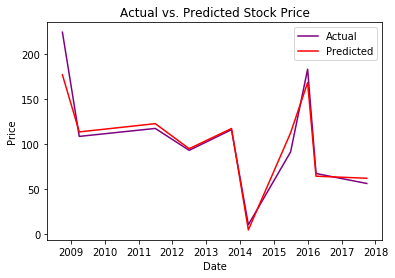

In [62]:
#Graphing actual vs predicted stock price
ax = sns.lineplot(x='date',y='Actual',data=fin_actual_predicted, color='purple')
ax = sns.lineplot(x='date',y='Predicted',data=fin_actual_predicted, color='red')
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Actual vs. Predicted Stock Price")
plt.legend(labels=['Actual','Predicted'])